In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import thinkstats2
import thinkplot
import pandas as pd
import math
from statistics import mode, StatisticsError
import statsmodels.formula.api as smf

In [3]:
cancer = pd.read_csv('biopsy.csv')
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [48]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


If an abormal mass is observed in patient's breast, a biopsy is performed to remove cells from the mass to determine if the mass is benign or malignant. The dataset contains 569 records with the following variables:
 
mean_radius: the mean of the distances from the center of the cell nuclei to points on the perimeter
mean_texture: the mean variance of gray-scale values in component pixels.
mean_perimeter: the mean distance around the nuclei
mean_area: the mean area of the nuclei
mean_smoothness: the mean of local variation in radius length
diagnosis: the diagnosis of the mass, where 0 = malignant and 1 = benign.

I want to change the diagnosis variable into a categorical variable. 

In [135]:
malignant = cancer[cancer.diagnosis == 0]
benign = cancer[cancer.diagnosis == 1]

I want to look at the distributions of the variables using histograms.

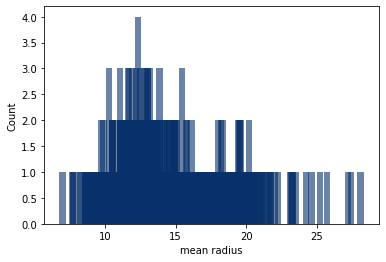

In [51]:
hist_radius = thinkstats2.Hist(cancer.mean_radius)
thinkplot.Hist(hist_radius, width=.45)
thinkplot.Config(xlabel='mean radius', ylabel='Count')

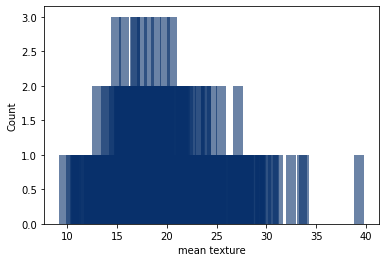

In [52]:
hist_texture = thinkstats2.Hist(cancer.mean_texture)
thinkplot.Hist(hist_texture, width=1)
thinkplot.Config(xlabel='mean texture', ylabel='Count')

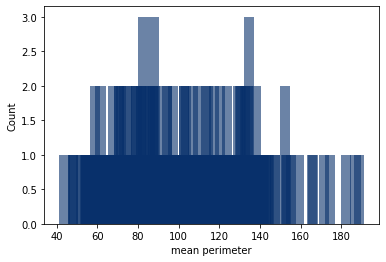

In [53]:
hist = thinkstats2.Hist(cancer.mean_perimeter)
thinkplot.Hist(hist, width=5)
thinkplot.Config(xlabel='mean perimeter', ylabel='Count')

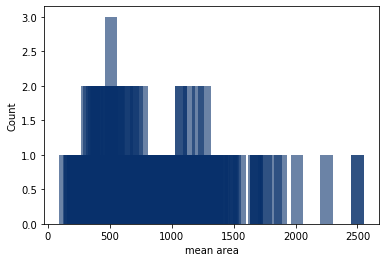

In [54]:
hist = thinkstats2.Hist(cancer.mean_area)
thinkplot.Hist(hist, width=100)
thinkplot.Config(xlabel='mean area', ylabel='Count')

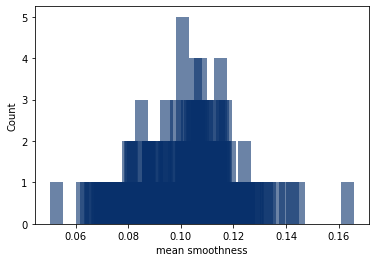

In [55]:
hist = thinkstats2.Hist(cancer.mean_smoothness)
thinkplot.Hist(hist, width=0.005)
thinkplot.Config(xlabel='mean smoothness', ylabel='Count')

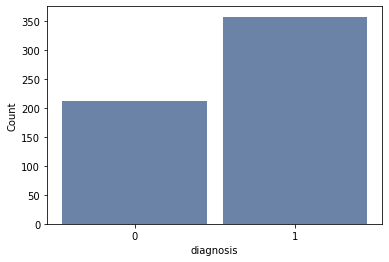

In [56]:
hist = thinkstats2.Hist(cancer.diagnosis)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='diagnosis', ylabel='Count', xticks=[0,1])

Now, I want to look at the summaries of the distributions. 

In [61]:
try:
    r_mode = statistics.mode(cancer.mean_radius)
    print('mode  ', r_mode)
except StatisticsError:
    print('mode  multimodal')

mode   12.34


In [58]:
cancer.mean_radius.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean_radius, dtype: float64

In [59]:
try:
    t_mode = statistics.mode(cancer.mean_texture)
    print('mode  ', t_mode)
except StatisticsError:
    print('mode  multimodal')

mode  multimodal


In [60]:
cancer.mean_texture.describe()

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: mean_texture, dtype: float64

In [62]:
try:
    p_mode = statistics.mode(cancer.mean_perimeter)
    print('mode  ', p_mode)
except StatisticsError:
    print('mode  multimodal')

mode  multimodal


In [63]:
cancer.mean_perimeter.describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: mean_perimeter, dtype: float64

In [64]:
try:
    a_mode = statistics.mode(cancer.mean_area)
    print('mode  ', a_mode)
except StatisticsError:
    print('mode  multimodal')

mode   512.2


In [65]:
cancer.mean_area.describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: mean_area, dtype: float64

In [66]:
try:
    s_mode = statistics.mode(cancer.mean_smoothness)
    print('mode  ', s_mode)
except StatisticsError:
    print('mode  multimodal')

mode   0.1007


In [67]:
cancer.mean_smoothness.describe()

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: mean_smoothness, dtype: float64

In [70]:
try:
    d_mode = statistics.mode(cancer.diagnosis)
    print('mode  ', d_mode)
except StatisticsError:
    print('mode  multimodal')

mode   1


In [72]:
cancer.diagnosis.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

I want to create two PMFs to compare area and smoothness for the malignant and benign diagnosis. 

In [28]:
m_smoothness_pmf = thinkstats2.Pmf(malignant.mean_smoothness, label='malignant')
b_smoothness_pmf = thinkstats2.Pmf(benign.mean_smoothness, label='benign')

m_area_pmf = thinkstats2.Pmf(malignant.mean_area, label='malignant')
b_area_pmf = thinkstats2.Pmf(benign.mean_area, label='benign')

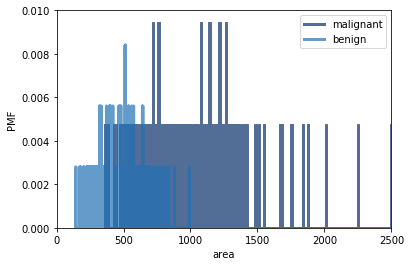

<Figure size 576x432 with 0 Axes>

In [75]:
thinkplot.Pmfs([m_area_pmf,b_area_pmf])
thinkplot.Show(xlabel='area', ylabel='PMF', axis=[0, 2500, 0, 0.01], legend=True)

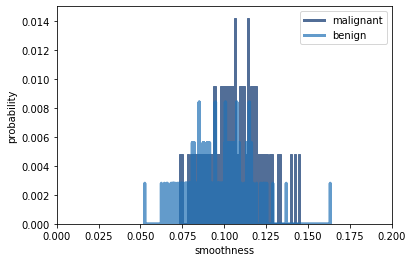

<Figure size 576x432 with 0 Axes>

In [76]:
thinkplot.Pmfs([m_smoothness_pmf, b_smoothness_pmf])
thinkplot.Show(xlabel='smoothness', ylabel='probability',axis=[0, 0.2, 0, 0.015], legend=True)

I want to compare CDFs to show that there is a difference between the texture, area, and smoothness of cell nuclei for malignant and benign masses.

In [79]:
m_texture_cdf = thinkstats2.Cdf(malignant.mean_texture, label='malignant')
b_texture_cdf = thinkstats2.Cdf(benign.mean_texture, label='benign')

m_area_cdf = thinkstats2.Cdf(malignant.mean_area, label='malignant')
b_area_cdf = thinkstats2.Cdf(benign.mean_area, label='benign')

m_smoothness_cdf = thinkstats2.Cdf(malignant.mean_smoothness, label='malignant')
b_smoothness_cdf = thinkstats2.Cdf(benign.mean_smoothness, label='benign')

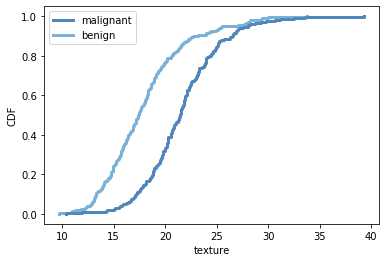

<Figure size 576x432 with 0 Axes>

In [80]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([m_texture_cdf, b_texture_cdf])
thinkplot.Show(xlabel='texture', ylabel='CDF')

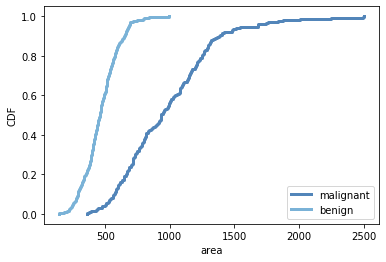

<Figure size 576x432 with 0 Axes>

In [84]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([m_area_cdf, b_area_cdf])
thinkplot.Show(xlabel='area', ylabel='CDF')

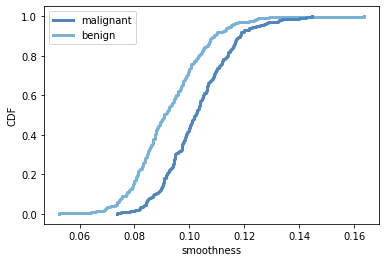

<Figure size 576x432 with 0 Axes>

In [82]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([m_smoothness_cdf, b_smoothness_cdf])
thinkplot.Show(xlabel='smoothness', ylabel='CDF')

I will use a lognormal model on the data. 

In [130]:
def MakeNormalModel(variable):
    """Plots a CDF with a Normal model.

    variable: sequence
    """
    cdf = thinkstats2.Cdf(variable, label='data')

    mean, var = thinkstats2.TrimmedMeanVar(variable)
    std = np.sqrt(var)
    print('n, mean, std', len(variable), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)
    
def MakeNormalPlot(variable):
    """Generates a normal probability plot of given variable.

    variable: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(variable, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(variable)
    thinkplot.Plot(xs, ys, label='data')

First, I will plot mean textures on a log-x scale. 

n, mean, std 569 1.2747518190993574 0.0903710537119193


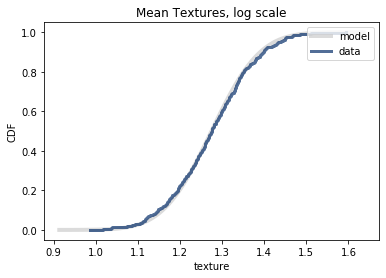

In [129]:
log_textures = np.log10(cancer.mean_texture)
MakeNormalModel(log_textures)
thinkplot.Config(title='Mean Textures, log scale', xlabel='texture',
                 ylabel='CDF', loc='upper right')

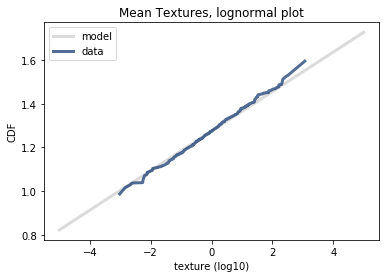

In [117]:
MakeNormalPlot(log_textures)
thinkplot.Config(title='Mean Textures, lognormal plot', xlabel='texture (log10)',
                 ylabel='CDF', loc='upper left')

n, mean, std 569 2.7629710635287594 0.19804686281245198


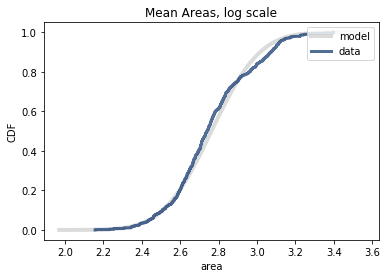

In [108]:
log_areas = np.log10(cancer.mean_area)
MakeNormalModel(log_areas)
thinkplot.Config(title='Mean Areas, log scale', xlabel='area',
                 ylabel='CDF', loc='upper right')

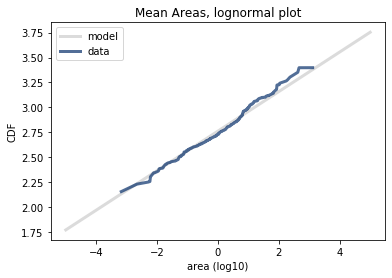

In [118]:
MakeNormalPlot(log_areas)
thinkplot.Config(title='Mean Areas, lognormal plot', xlabel='area (log10)',
                 ylabel='CDF', loc='upper left')

n, mean, std 569 -1.0206486916007544 0.058590046483324575


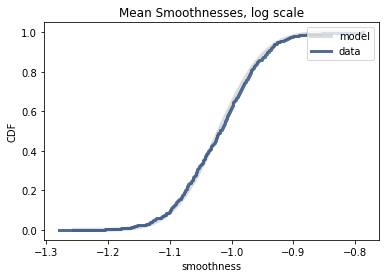

In [110]:
log_smoothnesses = np.log10(cancer.mean_smoothness)
MakeNormalModel(log_smoothnesses)
thinkplot.Config(title='Mean Smoothnesses, log scale', xlabel='smoothness',
                 ylabel='CDF', loc='upper right')

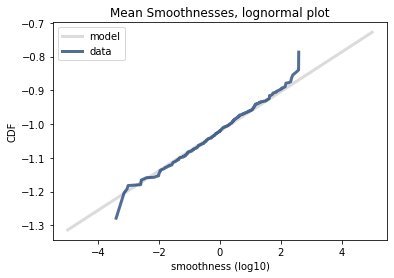

In [119]:
MakeNormalPlot(log_smoothnesses)
thinkplot.Config(title='Mean Smoothnesses, lognormal plot', xlabel='smoothness (log10)',
                 ylabel='CDF', loc='upper left')

We can see the lognormal model is a better fit for the data based on the lognormal plots.

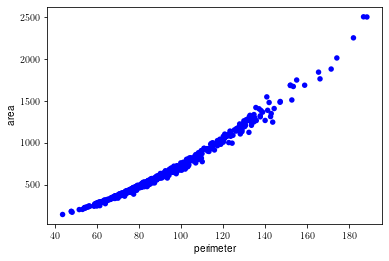

In [134]:
thinkplot.Scatter(cancer.mean_perimeter, cancer.mean_area, alpha=1)
thinkplot.Config(xlabel='perimeter',
                 ylabel='area',
                 #axis=[140, 210, 20, 200],
                 legend=False)

In [170]:
thinkstats2.Corr(cancer.mean_perimeter, cancer.mean_area)

0.9865068039913901

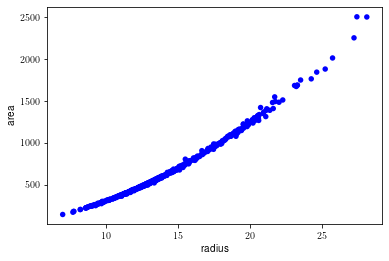

In [136]:
thinkplot.Scatter(cancer.mean_radius, cancer.mean_area, alpha=1)
thinkplot.Config(xlabel='radius',
                 ylabel='area',
                 #axis=[140, 210, 20, 200],
                 legend=False)

In [171]:
thinkstats2.Corr(cancer.mean_radius, cancer.mean_area)

0.9873571700566123

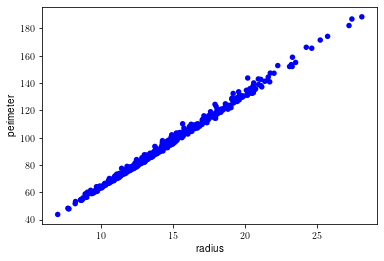

In [135]:
thinkplot.Scatter(cancer.mean_radius, cancer.mean_perimeter, alpha=1)
thinkplot.Config(xlabel='radius',
                 ylabel='perimeter',
                 #axis=[140, 210, 20, 200],
                 legend=False)

In [122]:
thinkstats2.Corr(cancer.mean_perimeter, cancer.mean_radius)

0.9978552814938108

I want to do a hypothesis test to see if there is a difference in mean texture, area, and smoothness between maligant and benign diagnosis. 

In [141]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [142]:
test1 = malignant.mean_texture.values, benign.mean_texture.values
test2 = malignant.mean_area.values, benign.mean_area.values
test3 = malignant.mean_smoothness.values, benign.mean_smoothness.values

In [143]:
ht1 = DiffMeansPermute(test1)
ht2 = DiffMeansPermute(test2)
ht3 = DiffMeansPermute(test3)
pvalue1 = ht1.PValue()
pvalue2 = ht2.PValue()
pvalue3 = ht3.PValue()
pvalue1, pvalue2, pvalue3

(0.0, 0.0, 0.0)

As the p-values are less than 0.001, we can conclude that the difference in texture, area, and smoothness is statistically signifcant.

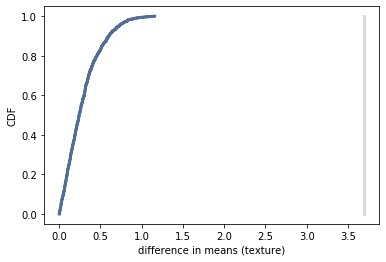

In [149]:
ht1.PlotCdf()
thinkplot.Config(xlabel='difference in means (texture)',
                   ylabel='CDF')

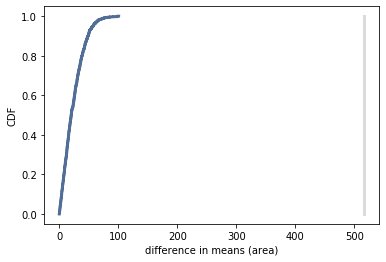

In [146]:
ht2.PlotCdf()
thinkplot.Config(xlabel='difference in means (area)',
                   ylabel='CDF')

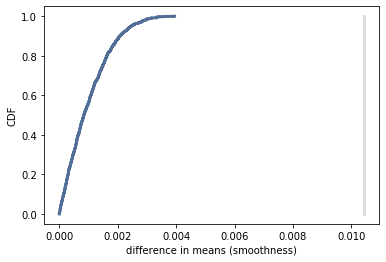

In [147]:
ht3.PlotCdf()
thinkplot.Config(xlabel='difference in means (smoothness)',
                   ylabel='CDF')

I want to predict the diagnosis. Because it is a categorical variable, I want to use logistic regression. 

In [150]:
cancer['malignant'] = (cancer.diagnosis==0).astype(int)
cancer['benign'] = (cancer.diagnosis==1).astype(int)

In [151]:
model = smf.logit('malignant ~ log_textures + log_smoothnesses + log_areas', data=cancer)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.153836
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              malignant   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.7670
Time:                        19:26:20   Log-Likelihood:                -87.533
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.333e-124
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -51.6957      6.994     -7.391      0.000     -65.404     -37.987
log_textures        18.4502      2.771      6.658      0.000      13.019      23.882
log_smoothnesses    36.8540      4.929      7.477      0.000      27.194      46.514
log_areas           23.2399      2.604      8.925      0.000      18.136      28.344
====================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [152]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [153]:
actual = endog['malignant']
baseline = actual.mean()
baseline

0.37258347978910367

The baseline prediction strategy is to guess "malignant". In that case, we're right almost 37% of the time.

Compute the accuracy of the model

In [168]:
predict = (results.predict() >= 0.50)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)

In [169]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.9402460456942003

The model is 94% accurate.